# 2015년 한국일보에서 '아이스크림'이 들어간 기사 검색

In [1]:
import requests

In [2]:
import lxml.html

In [3]:
url = 'http://news.naver.com/main/search/search.nhn?query=%BE%C6%C0%CC%BD%BA%C5%A9%B8%B2&st=news.all&q_enc=EUC-KR&r_enc=UTF-8&r_format=xml&rp=none&sm=all.basic&ic=all&so=datetime.dsc&rcnews=exist:038:469:&rcsection=exist:&stDate=range:20150101:20151231&detail=1&pd=4&start=126&display=25&startDate=2015-01-01&endDate=2015-12-31&page={}'

In [4]:
url

'http://news.naver.com/main/search/search.nhn?query=%BE%C6%C0%CC%BD%BA%C5%A9%B8%B2&st=news.all&q_enc=EUC-KR&r_enc=UTF-8&r_format=xml&rp=none&sm=all.basic&ic=all&so=datetime.dsc&rcnews=exist:038:469:&rcsection=exist:&stDate=range:20150101:20151231&detail=1&pd=4&start=126&display=25&startDate=2015-01-01&endDate=2015-12-31&page={}'

In [5]:
articles = []
for page in range(1, 22):
    res = requests.get(url.format(page))
    element = lxml.html.fromstring(res.content)
    for article in element.xpath('.//div[@class="ct"]'):
        articles.append([
                article.find('.//a[@class="tit"]').text,
                article.find('.//span[@class="time"]').text
            ])

# CSV 파일로 저장

In [6]:
import csv

In [7]:
with open('icecream.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    writer.writerows(articles)

# CSV 파일 불러오기

In [8]:
import csv

In [13]:
with open('icecream.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    articles = list(reader)

In [14]:
articles[:5]

[['[신춘문예 동화 당선작] ‘401호 욕할매’', '2015.12.31'],
 ["레드벨벳, 롤링스톤지 올해의 MV 톱10 선정 '아시아 유일'", '2015.12.25'],
 ['스타워즈 마케팅, 잠자던 소비의식 깨웠다고 전해라', '2015.12.22'],
 ['작은 사치로 큰 행복… 고급 디저트, 마트서도 인기', '2015.12.20'],
 ['\'프로듀스 101\' 장근석, 섹시한 입술로 "키스해~주세요~"', '2015.12.18']]

# 날짜 읽기

## dateutil 사용하는 방법

`pip install python-dateutil`로 설치

In [15]:
from dateutil.parser import parse

In [16]:
parse('2016-06-04')

datetime.datetime(2016, 6, 4, 0, 0)

In [17]:
parse('2016-06-04 2:29')

datetime.datetime(2016, 6, 4, 2, 29)

In [18]:
parse(articles[0][1])

datetime.datetime(2015, 12, 31, 0, 0)

## strptime을 사용하는 방법

In [19]:
from datetime import datetime

In [20]:
datetime.strptime('2016-06-04 02:29', '%Y-%m-%d %H:%M')

datetime.datetime(2016, 6, 4, 2, 29)

In [21]:
datetime.strptime('2016-06-04', '%Y-%m-%d')

datetime.datetime(2016, 6, 4, 0, 0)

In [22]:
datetime.strptime('2016년 6월 4일', '%Y년 %m월 %d일')

datetime.datetime(2016, 6, 4, 0, 0)

## datetime에서 date로 변환

In [23]:
parse(articles[0][1]).date()

datetime.date(2015, 12, 31)

In [24]:
for article in articles:
    article[1] = parse(article[1]).date()

In [25]:
articles[:5]

[['[신춘문예 동화 당선작] ‘401호 욕할매’', datetime.date(2015, 12, 31)],
 ["레드벨벳, 롤링스톤지 올해의 MV 톱10 선정 '아시아 유일'", datetime.date(2015, 12, 25)],
 ['스타워즈 마케팅, 잠자던 소비의식 깨웠다고 전해라', datetime.date(2015, 12, 22)],
 ['작은 사치로 큰 행복… 고급 디저트, 마트서도 인기', datetime.date(2015, 12, 20)],
 ['\'프로듀스 101\' 장근석, 섹시한 입술로 "키스해~주세요~"', datetime.date(2015, 12, 18)]]

# pandas를 이용해 날짜별 그룹화

[pandas 문서](http://pandas.pydata.org/pandas-docs/stable/index.html)

[groupby 사용법](http://pandas.pydata.org/pandas-docs/stable/groupby.html)

In [4]:
import pandas

In [27]:
df = pandas.DataFrame(articles, columns=['title', 'date'])

In [28]:
df

,title,date
0,[신춘문예 동화 당선작] ‘401호 욕할매’,2015-12-31
1,"레드벨벳, 롤링스톤지 올해의 MV 톱10 선정 '아시아 유일'",2015-12-25
2,"스타워즈 마케팅, 잠자던 소비의식 깨웠다고 전해라",2015-12-22
3,"작은 사치로 큰 행복… 고급 디저트, 마트서도 인기",2015-12-20
4,"'프로듀스 101' 장근석, 섹시한 입술로 ""키스해~주세요~""",2015-12-18
5,"AOA 초아, 혼자서도 충분한 음원 파워",2015-12-17
6,"석유시설 공습에도… IS, 세금 약탈로 지하드 경제 유지",2015-12-15
7,"'마녀의 성' 이해인, 귀여운",2015-12-15
8,한국 과자ㆍ음료…중국에서 '제2전성기',2015-12-13
9,"왕년의 음료·과자, 중국선 ‘제2 전성기’",2015-12-13


In [29]:
df.groupby([d.month for d in df.date], as_index=True).count()

,title,date
1,107,107
2,9,9
3,24,24
4,15,15
5,14,14
6,24,24
7,29,29
8,26,26
9,16,16
10,10,10


In [30]:
df['month'] = df.date.apply(lambda x: x.month)

In [31]:
df

,title,date,month
0,[신춘문예 동화 당선작] ‘401호 욕할매’,2015-12-31,12
1,"레드벨벳, 롤링스톤지 올해의 MV 톱10 선정 '아시아 유일'",2015-12-25,12
2,"스타워즈 마케팅, 잠자던 소비의식 깨웠다고 전해라",2015-12-22,12
3,"작은 사치로 큰 행복… 고급 디저트, 마트서도 인기",2015-12-20,12
4,"'프로듀스 101' 장근석, 섹시한 입술로 ""키스해~주세요~""",2015-12-18,12
5,"AOA 초아, 혼자서도 충분한 음원 파워",2015-12-17,12
6,"석유시설 공습에도… IS, 세금 약탈로 지하드 경제 유지",2015-12-15,12
7,"'마녀의 성' 이해인, 귀여운",2015-12-15,12
8,한국 과자ㆍ음료…중국에서 '제2전성기',2015-12-13,12
9,"왕년의 음료·과자, 중국선 ‘제2 전성기’",2015-12-13,12


In [32]:
count = df.groupby('month').agg({'title': len})

In [33]:
count

,title
month,
1,107
2,9
3,24
4,15
5,14
6,24
7,29
8,26
9,16


# 시각화

In [34]:
%matplotlib inline

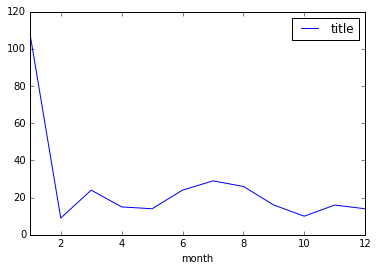

In [35]:
count.plot()

## Seaborn을 이용해 좀 더 예쁘게 그리기

seaborn을 사용하려면 먼저 `conda install seaborn`으로 설치하세요

[seaborn 홈페이지](https://web.stanford.edu/~mwaskom/software/seaborn/index.html)

[tsplot 함수 사용법](https://web.stanford.edu/~mwaskom/software/seaborn/examples/timeseries_from_dataframe.html)

In [1]:
import seaborn

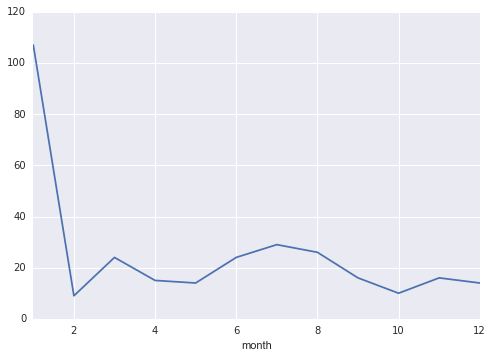

In [37]:
seaborn.tsplot(count['title'], time=count.index)

# 특정 단어 제외하기

In [84]:
words = ['콜라', '사이다', '녹차', '커피']

In [87]:
exclude = ['콜라', '사이다']  # 제외할 단어 목록

In [88]:
[w for w in words if w not in exclude]

['녹차', '커피']

# 여러 단어의 추세 그리기

In [79]:
data = pandas.DataFrame({'month': [1, 1, 2, 2, 3, 3],
                         'count': [20, 40, 60, 10, 30, 30],
                         'word': ['사과', '바나나', '사과', '바나나', '사과', '바나나']})

In [80]:
data

,count,month,word
0,20,1,사과
1,40,1,바나나
2,60,2,사과
3,10,2,바나나
4,30,3,사과
5,30,3,바나나


In [11]:
%matplotlib inline

In [81]:
seaborn.set_style('darkgrid', {'font.family': 'Malgun Gothic'})

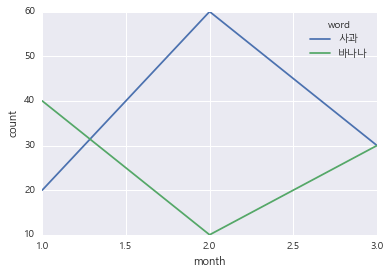

In [83]:
seaborn.tsplot(data=data, value="count", time='month', condition='word', unit='word')